<a href="https://colab.research.google.com/github/ADITYA-KUMAR-PAL/Regression-analysis-for-Predictive-modelling/blob/main/Copy_of_Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all of the important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import boxcox,t

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Reading .xlsx file

In [ ]:
df=pd.read_excel("Team_7.xlsx")

In [ ]:
df.head()

,Unnamed: 0,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,31.320114,0,0,2,0.555819,1.584924,26.192308,4.796470,8.180949,1.805887,0.600904,1.252237
1,2,34.197403,0,1,1,0.128395,0.276552,29.578684,10.227638,9.487054,2.940475,0.148958,3.052631
2,3,27.070836,1,1,2,1.217141,1.180589,24.219752,6.614455,3.812708,2.238674,0.056757,1.406275
3,4,29.558225,0,0,1,3.188542,3.183415,-13.026331,2.271375,9.833847,0.833258,0.590036,1.481036
4,5,28.579797,1,1,1,0.137843,0.773730,-22.240923,0.813027,9.859867,1.775215,0.654086,2.721535


Checking null values

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Y             0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
dtype: int64

Viewing Columns

In [ ]:
for col_index, col_name in enumerate(df.columns):
  print(f"Column {col_index+1}: {col_name}")

Column 1: Unnamed: 0
Column 2: Y
Column 3: X1
Column 4: X2
Column 5: X3
Column 6: X4
Column 7: X5
Column 8: X6
Column 9: X7
Column 10: X8
Column 11: X9
Column 12: X10
Column 13: X11


Dropping index column

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,31.320114,0,0,2,0.555819,1.584924,26.192308,4.796470,8.180949,1.805887,0.600904,1.252237
1,34.197403,0,1,1,0.128395,0.276552,29.578684,10.227638,9.487054,2.940475,0.148958,3.052631
2,27.070836,1,1,2,1.217141,1.180589,24.219752,6.614455,3.812708,2.238674,0.056757,1.406275
3,29.558225,0,0,1,3.188542,3.183415,-13.026331,2.271375,9.833847,0.833258,0.590036,1.481036
4,28.579797,1,1,1,0.137843,0.773730,-22.240923,0.813027,9.859867,1.775215,0.654086,2.721535


Splitting original data into training and testing data

In [ ]:
# Define the features (X) and the target variable (y)
X_categorical = df[['X1', 'X2', 'X3']]  # Assuming X1, X2, X3 are categorical
X_numerical = df[['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
y = df['Y']

# Split the data into training and testing sets
X_train_categorical, X_test_categorical, X_train_numerical, X_test_numerical, y_train, y_test = train_test_split(
    X_categorical, X_numerical, y, test_size=0.3, random_state=42)

# Concatenate categorical and numerical features for both training and testing sets
X_train = pd.concat([X_train_categorical, X_train_numerical], axis=1)
X_test = pd.concat([X_test_categorical, X_test_numerical], axis=1)

# Create DataFrames for training and testing data
df_tr = pd.concat([y_train, X_train], axis=1)
df_tt = pd.concat([y_test, X_test], axis=1)

# Display the shapes of training and testing sets
print("Training set shape:", df_tr.shape)
print("Testing set shape:", df_tt.shape)

Training set shape: (140, 12)
Testing set shape: (60, 12)


#making the dataset copy and working ahead

In [ ]:
df1=df_tr.copy()
print("Training set shape:", df1.shape)
df1.head()

Training set shape: (140, 12)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
169,26.383039,1,0,2,2.523325,2.249663,-35.537470,2.940260,9.343826,2.403424,0.388336,1.645542
97,30.619274,1,1,2,1.486211,1.588179,38.038152,0.325675,8.821419,2.617148,0.938515,1.918123
31,24.536187,1,1,1,0.505402,0.929610,0.727036,3.722579,4.065191,1.014760,0.438146,0.509054
12,30.056950,0,0,1,0.858711,1.183343,7.748860,7.299951,7.629102,0.083079,0.490484,3.023242
35,25.605174,0,0,2,1.069028,1.295796,7.391848,1.529484,5.925631,0.301373,0.225541,0.907127


In [ ]:
df2=df_tt.copy()
print("Testing set shape:", df2.shape)
df2.head()

Testing set shape: (60, 12)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
95,21.135836,1,0,2,3.281085,3.410812,-37.292168,6.313924,2.795760,1.937699,0.651387,1.921061
15,26.231587,1,1,2,3.450723,3.344352,-38.441854,3.771712,7.908231,2.842326,0.426588,1.865321
30,18.731665,1,0,2,1.930948,2.240228,-20.437910,0.703925,2.834755,0.837204,0.548661,1.860272
158,29.611666,1,0,1,1.965649,2.137137,39.593789,12.993663,2.938618,-1.284300,0.777811,2.293068
128,21.593585,1,0,2,4.005424,3.268977,-11.462802,2.440499,2.223371,-1.289500,0.352465,1.732214


In [ ]:
# Define the response variable name
response_var = 'Y'

# Separate the response variable and predictor variables
Y = df1[response_var]  # Response variable
X = df1.drop(response_var, axis=1)  # Predictor variables (all columns except the response variable)

print("Response Variable (y):")
print(Y)
print("\nPredictor Variables (X):")
print(X)


Response Variable (y):
169    26.383039
97     30.619274
31     24.536187
12     30.056950
35     25.605174
         ...    
106    31.758678
14     26.189215
92     24.997862
179    23.551185
102    32.650287
Name: Y, Length: 140, dtype: float64

Predictor Variables (X):
     X1  X2  X3        X4        X5         X6        X7        X8        X9  \
169   1   0   2  2.523325  2.249663 -35.537470  2.940260  9.343826  2.403424   
97    1   1   2  1.486211  1.588179  38.038152  0.325675  8.821419  2.617148   
31    1   1   1  0.505402  0.929610   0.727036  3.722579  4.065191  1.014760   
12    0   0   1  0.858711  1.183343   7.748860  7.299951  7.629102  0.083079   
35    0   0   2  1.069028  1.295796   7.391848  1.529484  5.925631  0.301373   
..   ..  ..  ..       ...       ...        ...       ...       ...       ...   
106   1   0   1  2.345286  2.346884  89.442698  0.710308  7.575812 -1.681139   
14    0   0   1 -0.028203  0.935908  24.665755  1.100597  4.482603 -1.626991   
92    1

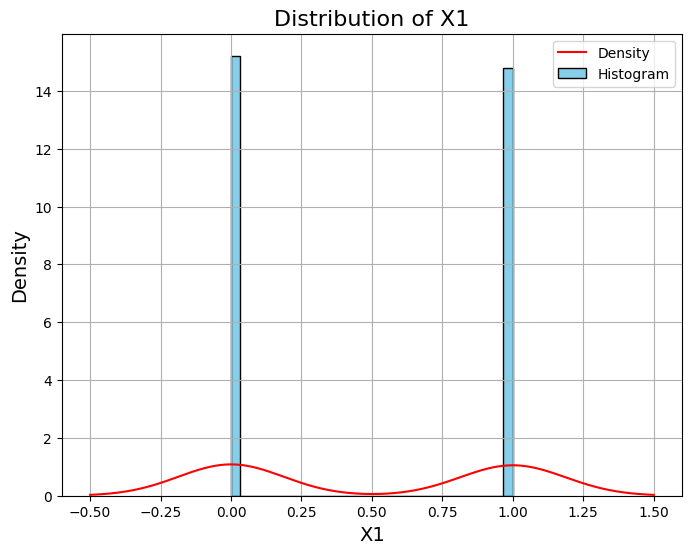

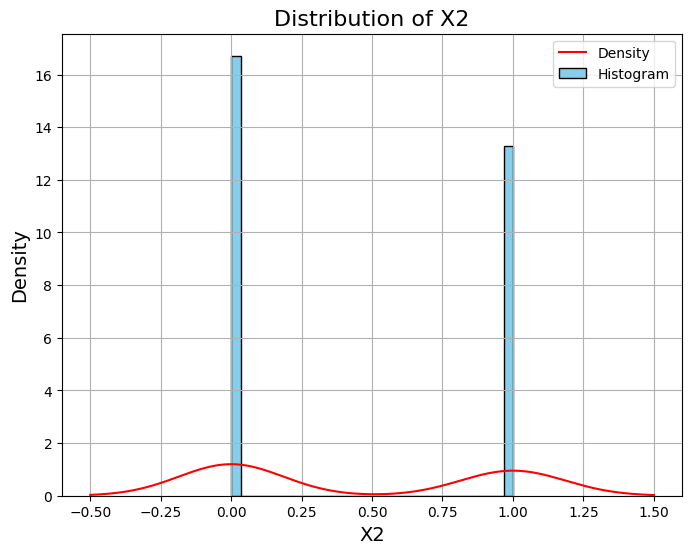

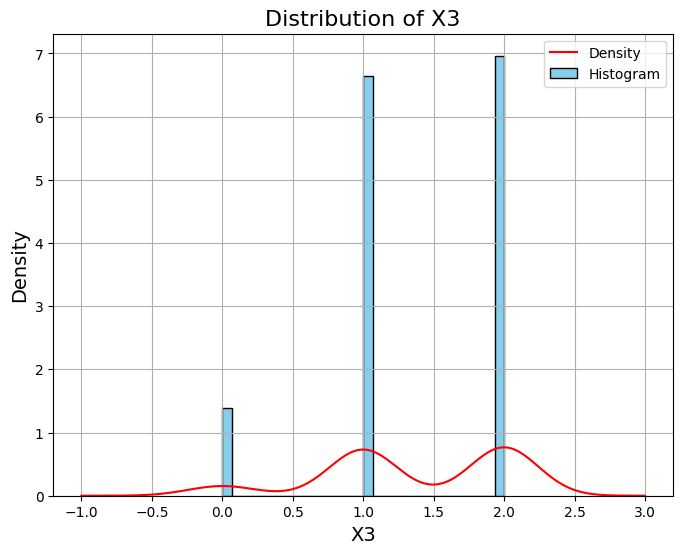

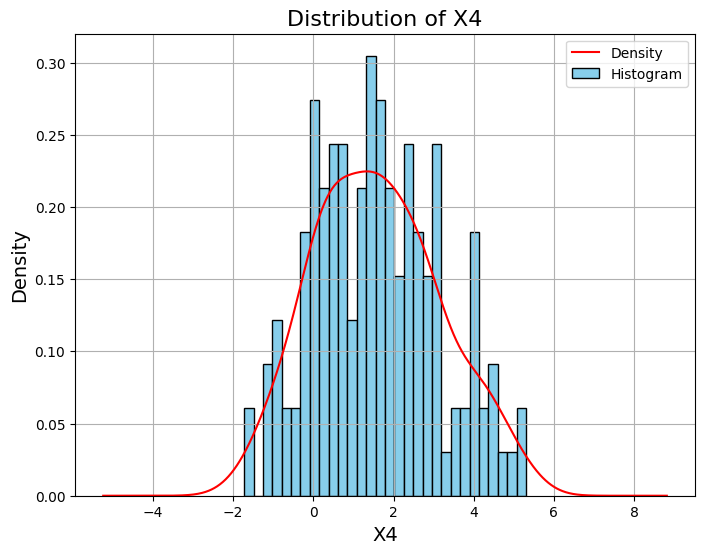

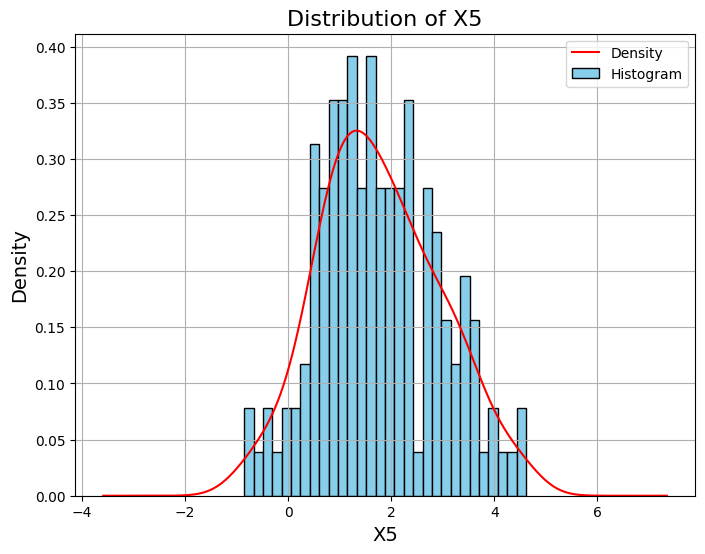

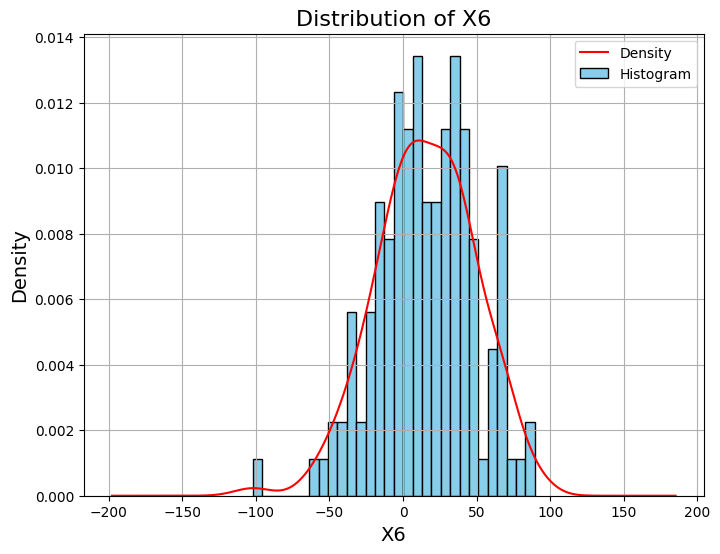

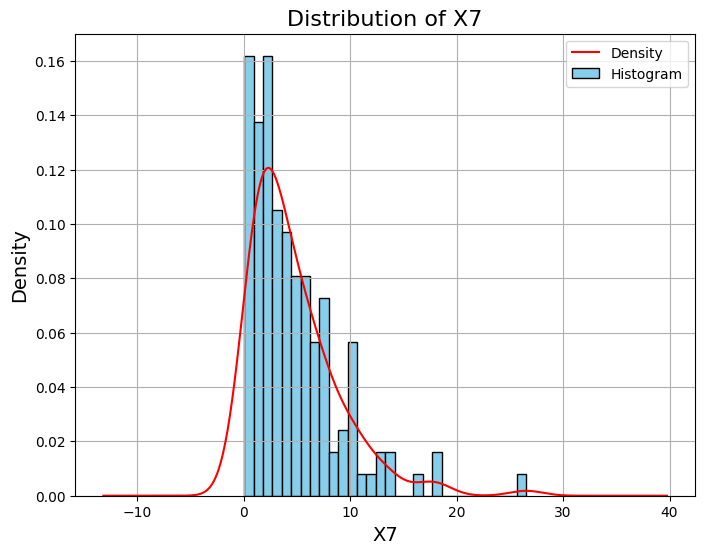

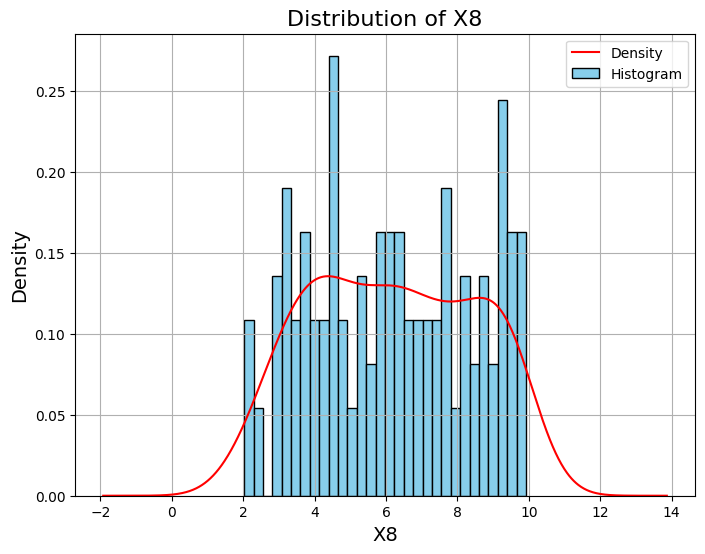

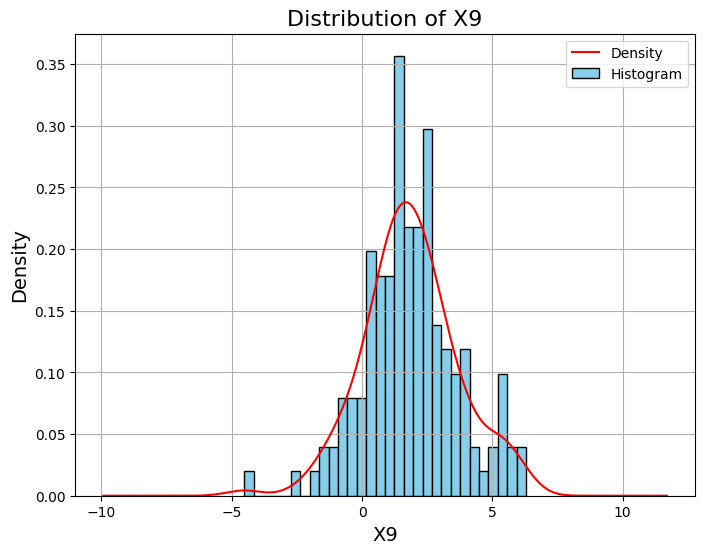

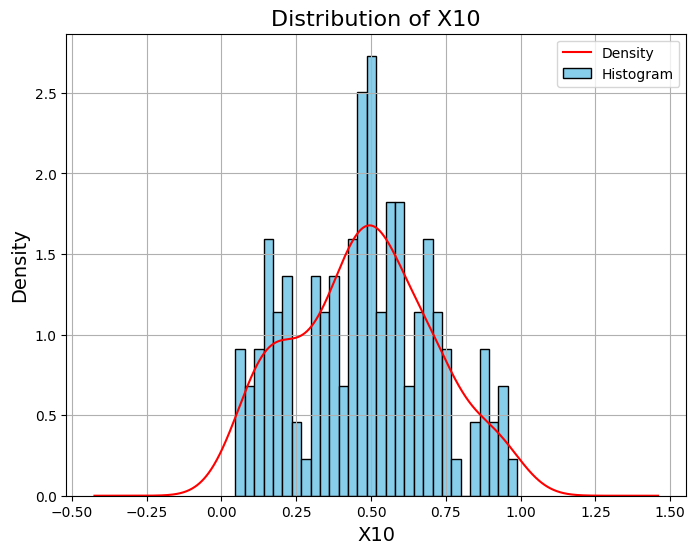

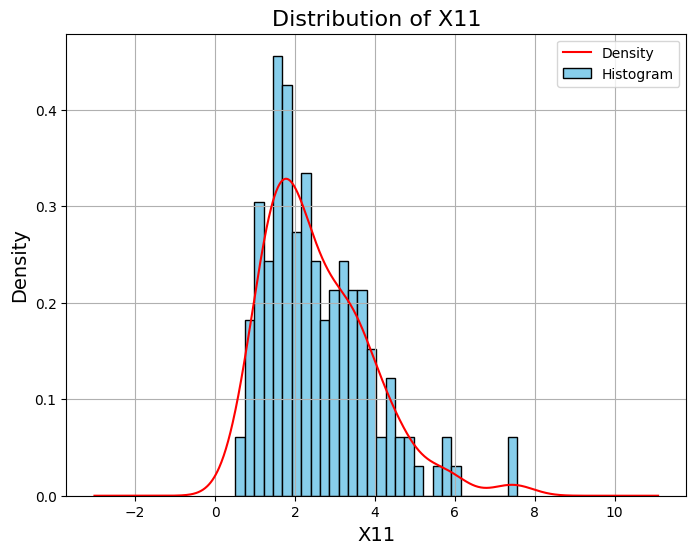

In [ ]:
# Iterate through each column in X and plot its distribution with density line
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X[column], bins=30, density=True, color='skyblue', edgecolor='black')
    X[column].plot(kind='kde', color='red')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(['Density', 'Histogram'])
    plt.grid(True)
    plt.show()

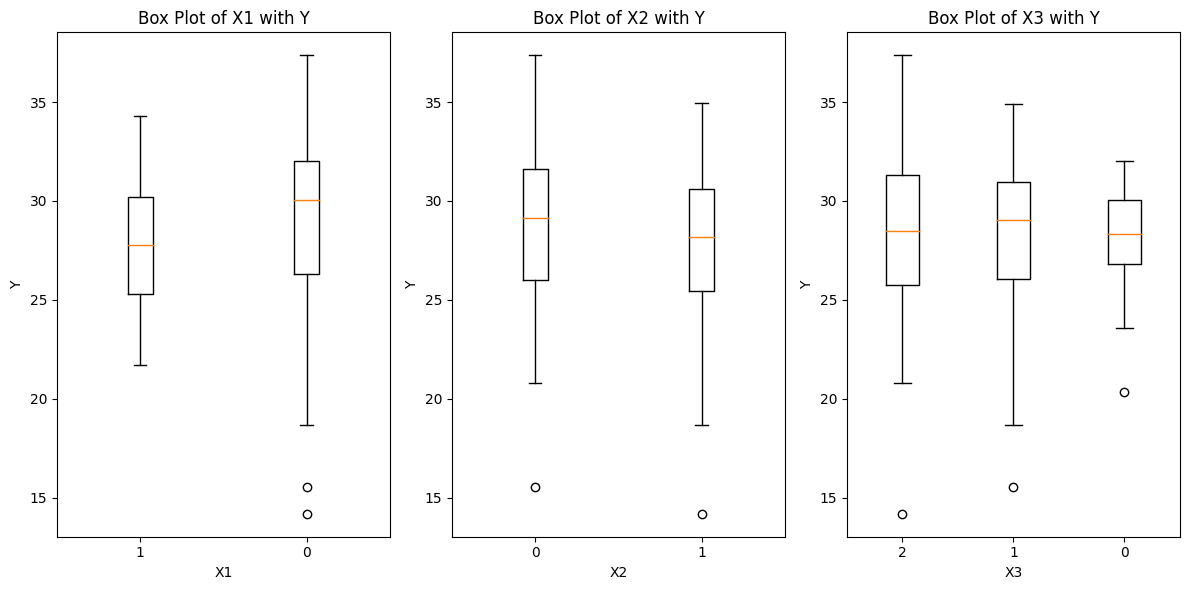

In [ ]:
import matplotlib.pyplot as plt

# Create box plots
plt.figure(figsize=(12, 6))

# Box plot for X1
plt.subplot(1, 3, 1)
plt.boxplot([df1[df1['X1'] == i]['Y'] for i in df1['X1'].unique()], labels=df1['X1'].unique())
plt.title('Box Plot of X1 with Y')
plt.xlabel('X1')
plt.ylabel('Y')

# Box plot for X2
plt.subplot(1, 3, 2)
plt.boxplot([df1[df1['X2'] == i]['Y'] for i in df1['X2'].unique()], labels=df1['X2'].unique())
plt.title('Box Plot of X2 with Y')
plt.xlabel('X2')
plt.ylabel('Y')

# Box plot for X3
plt.subplot(1, 3, 3)
plt.boxplot([df1[df1['X3'] == i]['Y'] for i in df1['X3'].unique()], labels=df1['X3'].unique())
plt.title('Box Plot of X3 with Y')
plt.xlabel('X3')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

Classifying the numerical **and** categorical variables

In [ ]:
# Initialize empty lists to store categorical and numerical variable names
categorical_vars = []
numerical_vars = []

# Check unique values in X1, X2, and X3
for column in ['X1', 'X2', 'X3']:
    unique_values = X[column].unique()
    if len(unique_values) <= 4:  # Arbitrarily chosen threshold, you can adjust it based on your data
        categorical_vars.append(column)
    else:
        numerical_vars.append(column)

# Add the rest of the columns to numerical_vars
numerical_vars.extend([col for col in X.columns if col not in ['X1', 'X2', 'X3']])

# Print the classified variables
print("Categorical Variables:")
print(categorical_vars)
print("\nNumerical Variables:")
print(numerical_vars)



Categorical Variables:
['X1', 'X2', 'X3']

Numerical Variables:
['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [ ]:
# Categorical variables: X1, X2, X3
categorical_vars = ['X1', 'X2', 'X3']

# Numerical variables: X4 to X11
numerical_vars = [col for col in X.columns if col not in categorical_vars]

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)



Categorical Variables: ['X1', 'X2', 'X3']
Numerical Variables: ['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


Removing the outliers by Cook's Distance


In [ ]:
# Calculate Cook's distance for all variables
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calculate_cooks_distance_all(X, y):
    model = sm.OLS(y, X).fit()
    infl = model.get_influence()
    cooks_distance = infl.cooks_distance[0]
    return cooks_distance

# Identify outliers based on Cook's distance for all variables
def remove_outliers_cooks_distance_all(X, y, threshold=4 / len(X)):
    cooks_distance = calculate_cooks_distance_all(X, y)
    outliers = np.where(cooks_distance > threshold)[0]
    X_clean = X.drop(X.index[outliers])
    y_clean = y.drop(y.index[outliers])
    outliers_df = X.iloc[outliers]  # Create dataframe of outliers
    return X_clean, y_clean, outliers_df

# Apply to all variables
Y_clean = Y.copy()  # Create a copy of Y to keep it intact
X_clean, Y_clean, outliers_df = remove_outliers_cooks_distance_all(X, Y_clean)

# Print the shape before and after removing outliers
print("Shape of X before removing outliers:", X.shape)
print("Shape of X after removing outliers:", X_clean.shape)
print("Shape of Y before removing outliers:", Y.shape)
print("Shape of Y after removing outliers:", Y_clean.shape)

# Print the shape of the outliers dataframe
print("Shape of outliers dataframe:", outliers_df.shape)



Shape of X before removing outliers: (140, 11)
Shape of X after removing outliers: (130, 11)
Shape of Y before removing outliers: (140,)
Shape of Y after removing outliers: (130,)
Shape of outliers dataframe: (10, 11)


In [ ]:
# Merge Y_clean and X_clean into a DataFrame
df1 = pd.concat([pd.DataFrame(Y_clean), pd.DataFrame(X_clean)], axis=1)
print("Shape of df1 after merging Y_clean and X_clean:", df1.shape)

Shape of df1 after merging Y_clean and X_clean: (130, 12)


Box Tidwell

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [ ]:
def box_tidwell(y, x):
    y = np.array(y)
    x = np.array(x)

    # Add a small constant only to predictor variables with zero or negative values
    small_const = 1e-10
    x[x_min <= 0] += small_const

    xlog_x = x * np.log(x)
    x_with_cons = sm.add_constant(x)

    model1 = sm.OLS(y, x_with_cons).fit()
    beta1_hat = model1.params[-1]

    x_with_log = np.concatenate((x_with_cons, xlog_x.reshape(-1, 1)), axis=1)
    model2 = sm.OLS(y, x_with_log).fit()

    gamma_hat = model2.params[-1]

    alpha_hat = gamma_hat / beta1_hat + 1

    return x ** alpha_hat


In [ ]:
def box_tidwell(y,x):
  y = np.array(y)
  x = np.array(x)

  # Check for zero or negative values in x
  if np.any(x <= 0):
      raise ValueError("Predictor variable contains zero or negative values.")

  xlog_x = x*np.log(x)
  x_with_cons = sm.add_constant(x)

  model1 = sm.OLS(y, x_with_cons).fit()
  beta1_hat = model1.params[-1]

  x_with_log = np.concatenate((x_with_cons, xlog_x.reshape(-1, 1)), axis=1)
  model2 = sm.OLS(y, x_with_log).fit()

  gamma_hat = model2.params[-1]

  alpha_hat = gamma_hat/beta1_hat + 1

  return x**alpha_hat

In [ ]:
import numpy as np

for column in df1.columns[1:]:
    x = df1[column].values.astype(np.float64)  # Convert to float64
    # Add small constant to handle negative or zero values
    small_const = 1e-10
    x[x <= 0] += small_const
    df1[column] = box_tidwell(df1.iloc[:, 0], x)

NameError: name 'x_min' is not defined

In [ ]:
for column in df1.columns[1:]:
    df1[column] = box_tidwell(df1.iloc[:, 0], df1[column])

NameError: name 'x_min' is not defined

Univariate analysis

Summary for X4:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.616
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.108
Time:                        10:28:15   Log-Likelihood:                -364.16
No. Observations:                 130   AIC:                             732.3
Df Residuals:                     128   BIC:                             738.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6719      0.502    

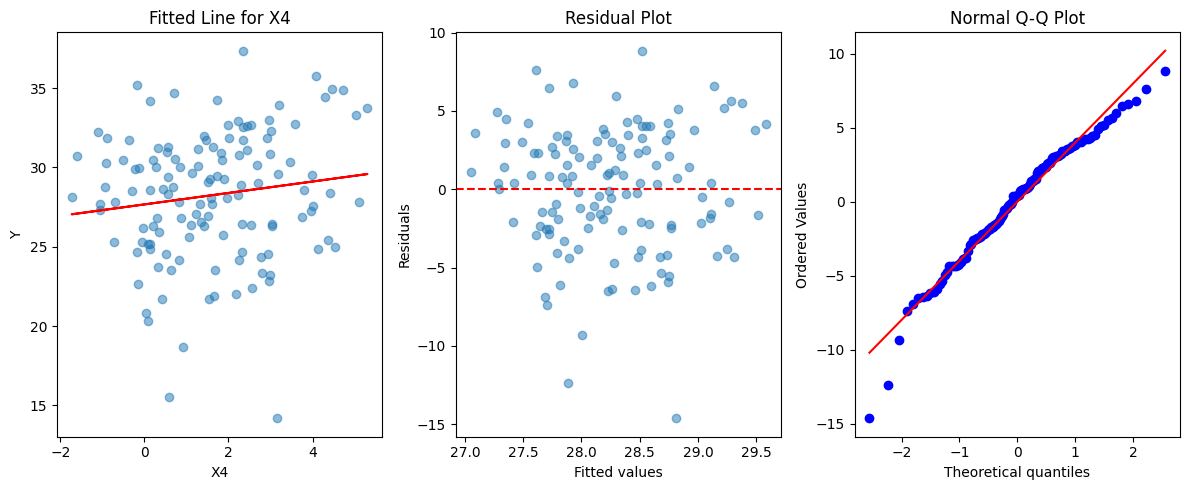

Summary for X5:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.732
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.190
Time:                        10:28:17   Log-Likelihood:                -364.60
No. Observations:                 130   AIC:                             733.2
Df Residuals:                     128   BIC:                             738.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5465      0.641    

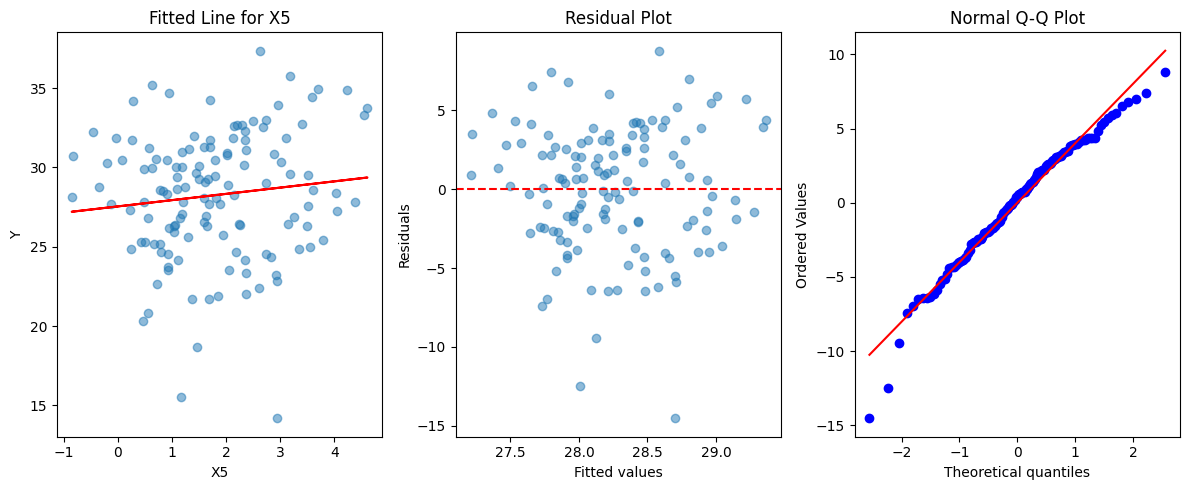

Summary for X6:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     112.3
Date:                Fri, 03 May 2024   Prob (F-statistic):           3.16e-19
Time:                        10:28:19   Log-Likelihood:                -324.53
No. Observations:                 130   AIC:                             653.1
Df Residuals:                     128   BIC:                             658.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9756      0.286    

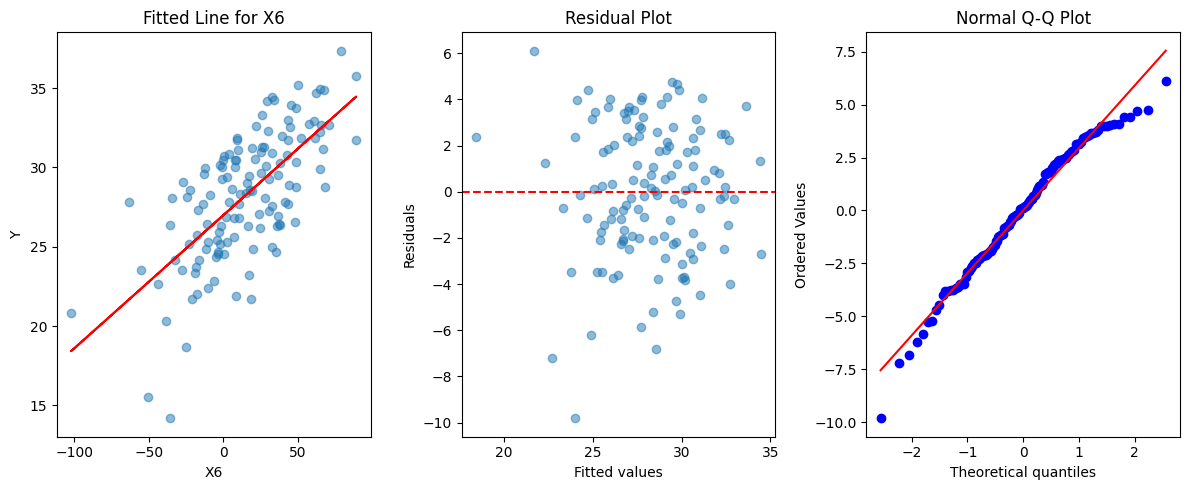

Summary for X7:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     17.93
Date:                Fri, 03 May 2024   Prob (F-statistic):           4.34e-05
Time:                        10:28:21   Log-Likelihood:                -356.96
No. Observations:                 130   AIC:                             717.9
Df Residuals:                     128   BIC:                             723.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4356      0.543    

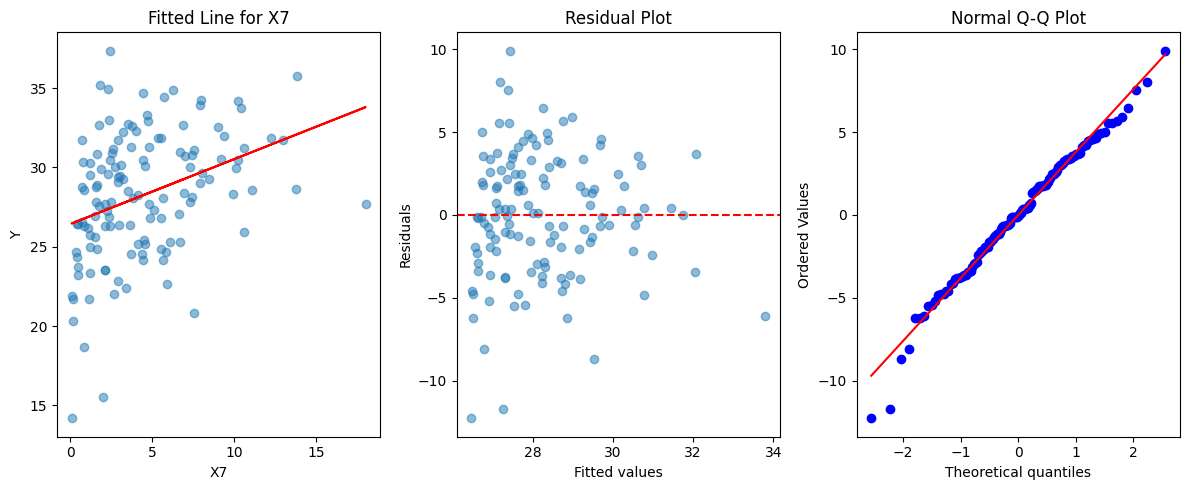

Summary for X8:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     39.91
Date:                Fri, 03 May 2024   Prob (F-statistic):           4.03e-09
Time:                        10:28:22   Log-Likelihood:                -347.84
No. Observations:                 130   AIC:                             699.7
Df Residuals:                     128   BIC:                             705.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7665      0.922    

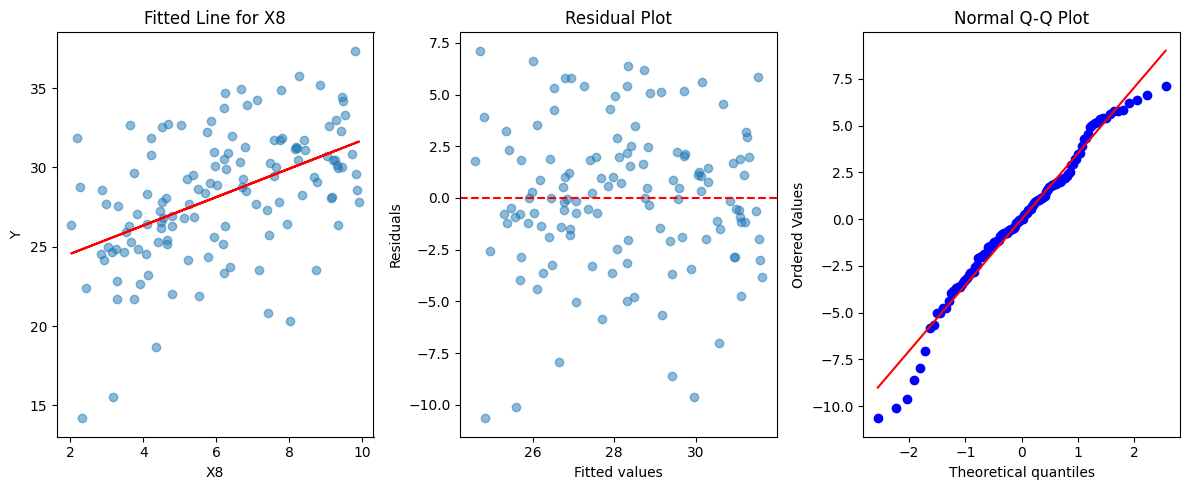

Summary for X9:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1638
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.686
Time:                        10:28:23   Log-Likelihood:                -365.39
No. Observations:                 130   AIC:                             734.8
Df Residuals:                     128   BIC:                             740.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3966      0.507    

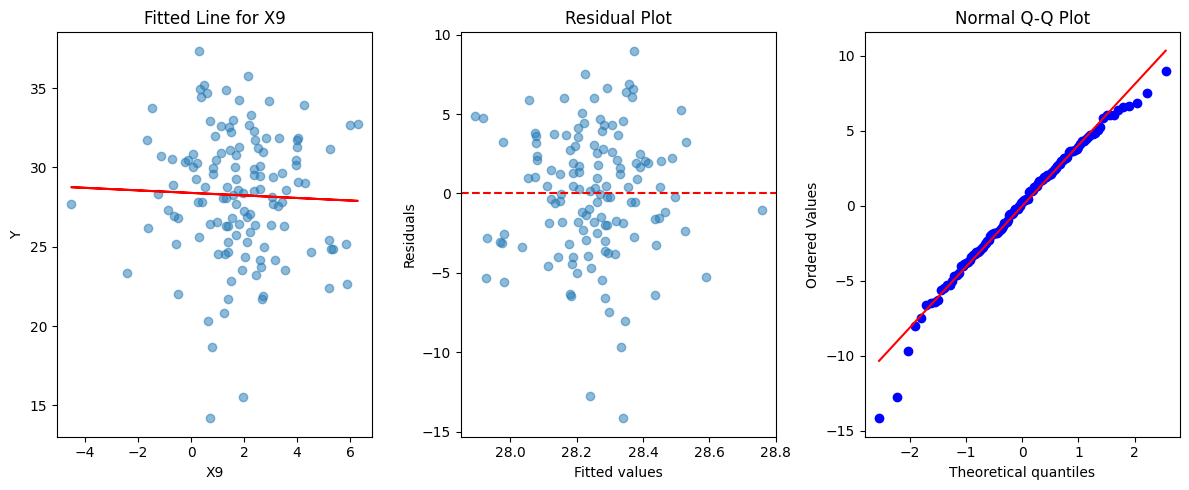

Summary for X10:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.001078
Date:                Fri, 03 May 2024   Prob (F-statistic):              0.974
Time:                        10:28:24   Log-Likelihood:                -365.48
No. Observations:                 130   AIC:                             735.0
Df Residuals:                     128   BIC:                             740.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2742      0.811   

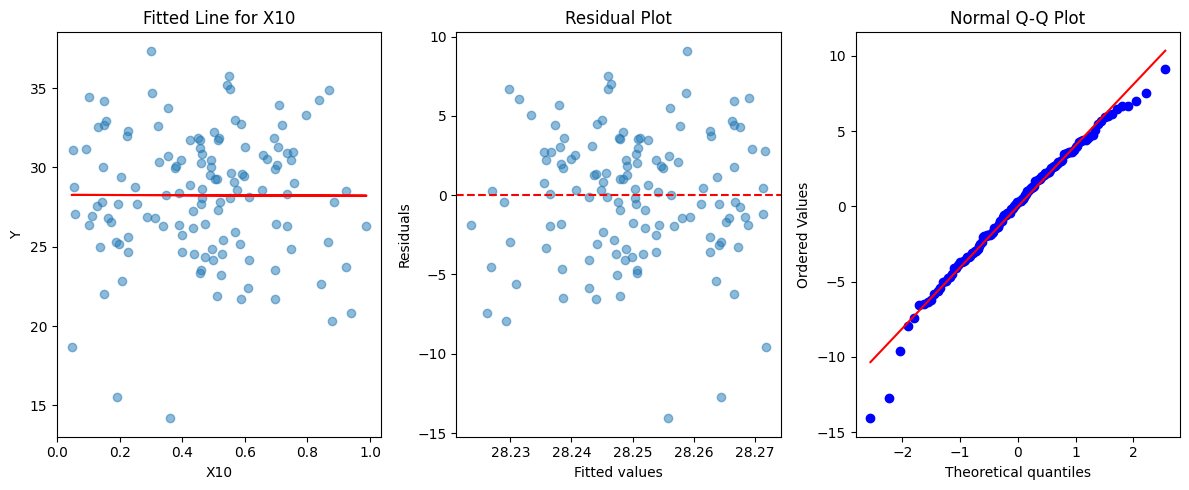

Summary for X11:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.149
Date:                Fri, 03 May 2024   Prob (F-statistic):             0.0249
Time:                        10:28:25   Log-Likelihood:                -362.91
No. Observations:                 130   AIC:                             729.8
Df Residuals:                     128   BIC:                             735.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6364      0.792   

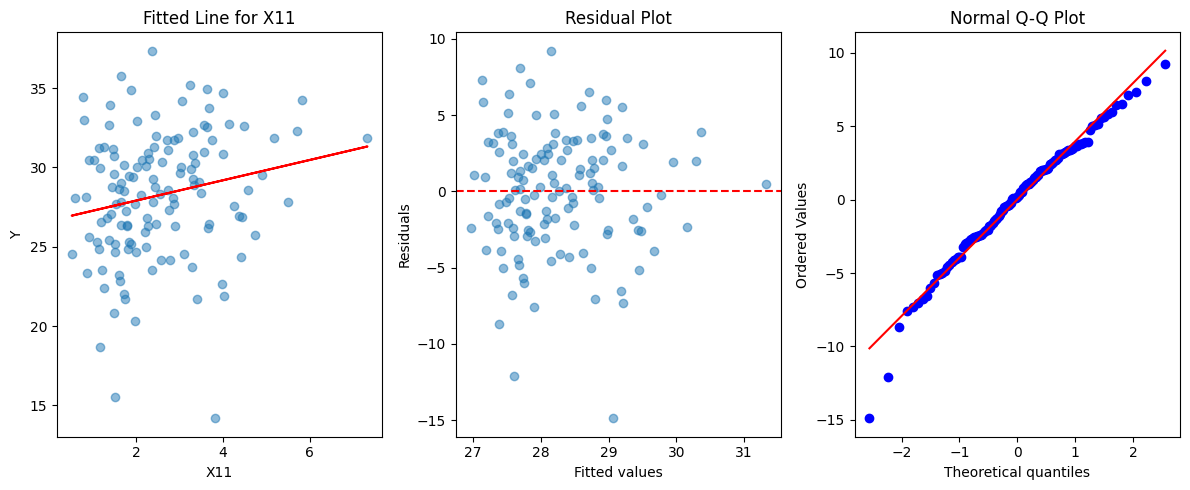

In [ ]:
# Fit univariate linear regression model, plot, and evaluate for each numerical variable
import scipy.stats as stats
for col in numerical_vars:
    # Fit the model
    X_col = X_clean[[col]]
    model = sm.OLS(Y_clean, sm.add_constant(X_col)).fit()

    # Plot fitted line with scatter plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(X_col, Y_clean, alpha=0.5)
    plt.plot(X_col, model.predict(sm.add_constant(X_col)), color='red')
    plt.title(f'Fitted Line for {col}')
    plt.xlabel(col)
    plt.ylabel('Y')

    # Plot residuals
    plt.subplot(1, 3, 2)
    residuals = model.resid
    plt.scatter(model.predict(), residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')

    # Normal QQ plot
    plt.subplot(1, 3, 3)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')

    # Print model summary
    print(f"Summary for {col}:")
    print(model.summary())

    plt.tight_layout()
    plt.show()


fitting a full model

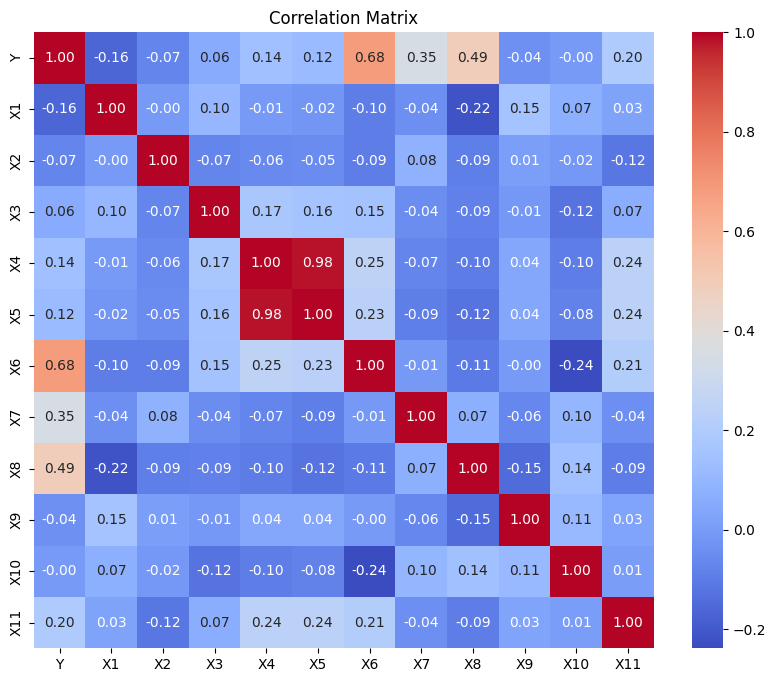

In [ ]:
correlation_matrix = df1.corr()
df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     95.45
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.68e-54
Time:                        10:48:54   Log-Likelihood:                -210.87
No. Observations:                 130   AIC:                             447.7
Df Residuals:                     117   BIC:                             485.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6302      0.765     21.746      0.0

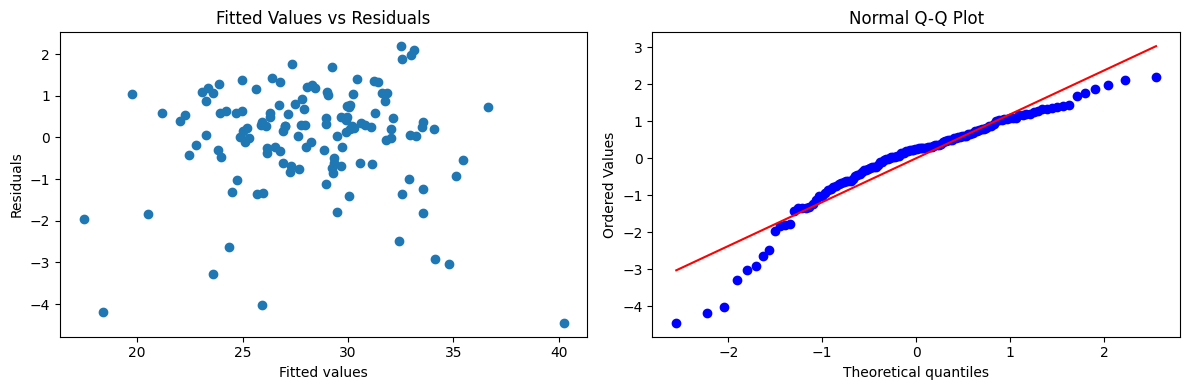

Brown-Forsythe test p-value: 0.7705391474326775


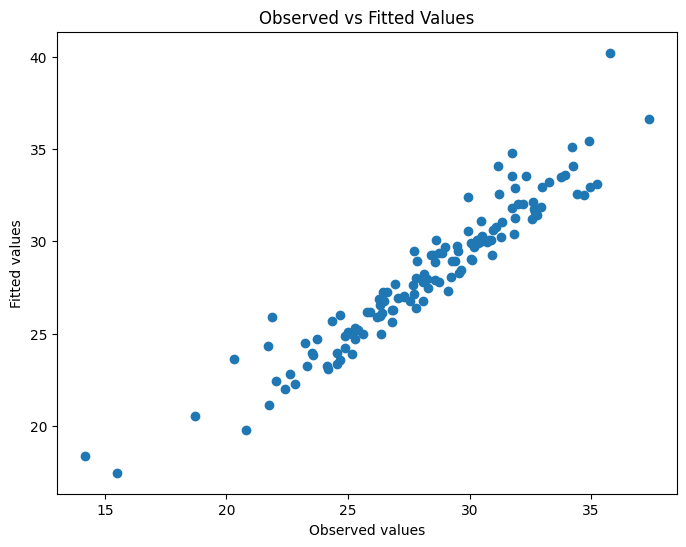

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming X_clean and Y_clean are already defined with outliers removed

# Create dummy variables for X1, X2, and X3
X_clean_with_dummies = pd.get_dummies(X_clean, columns=['X1', 'X2', 'X3'], drop_first=True)

# Convert all columns to float
X_clean_with_dummies = X_clean_with_dummies.astype(float)

# Fit the full model
X_clean_with_dummies = sm.add_constant(X_clean_with_dummies)  # Add constant term
model = sm.OLS(Y_clean, X_clean_with_dummies).fit()

# Print model summary
print(model.summary())

# Residual plot
residuals = model.resid
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')

# Normal QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.tight_layout()
plt.show()

# Brown-Forsythe test
bf_stat, bf_pvalue = stats.levene(Y_clean, model.fittedvalues)
print("Brown-Forsythe test p-value:", bf_pvalue)

# Fitted model plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_clean, model.fittedvalues)
plt.xlabel('Observed values')
plt.ylabel('Fitted values')
plt.title('Observed vs Fitted Values')
plt.show()


Backward Elimination

Significant variables for the linear regression fit:
['const', 'X6', 'X7', 'X8', 'X9', 'X11']
Model Summary after backward elimination:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     228.2
Date:                Fri, 03 May 2024   Prob (F-statistic):           9.49e-61
Time:                        10:50:15   Log-Likelihood:                -214.52
No. Observations:                 130   AIC:                             441.0
Df Residuals:                     124   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

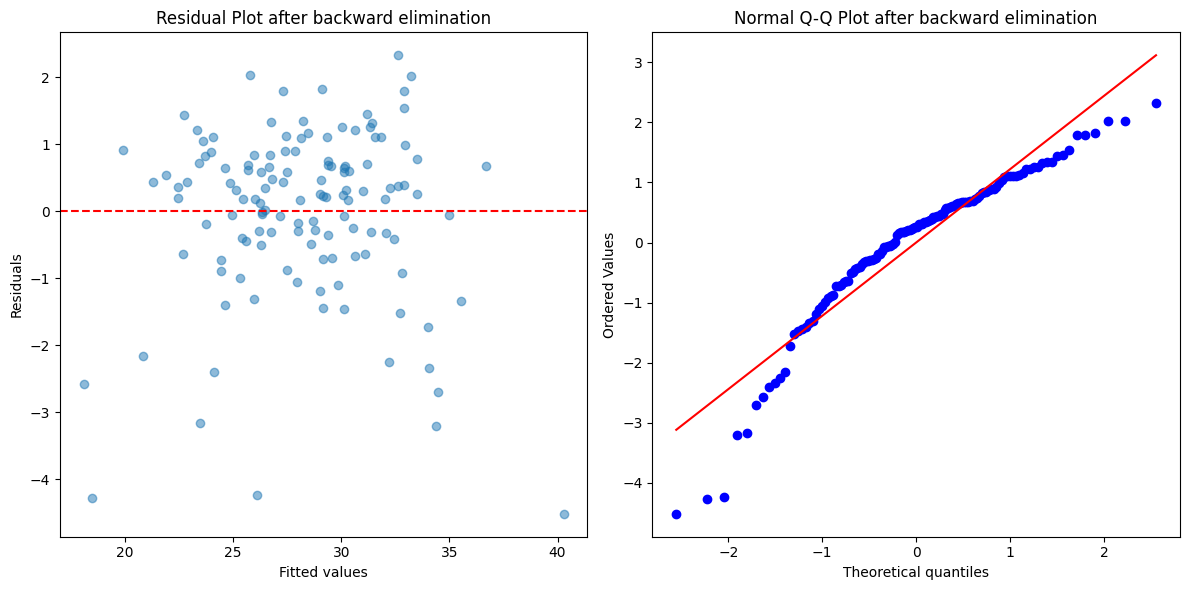

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

def backward_elimination(X, Y, significance_level=0.05):
    while True:
        # Fit the model
        model = sm.OLS(Y, sm.add_constant(X)).fit()
        # Get p-values for each coefficient
        p_values = model.pvalues[1:]  # Exclude the constant term
        # Find the variable with the highest p-value
        max_p_value = p_values.max()
        # If the highest p-value is greater than the significance level, remove the corresponding variable
        if max_p_value > significance_level:
            var_to_remove = p_values.idxmax()
            X = X.drop(columns=[var_to_remove])
        else:
            # If all p-values are below the significance level, break the loop
            break
    return model, X

# Perform backward elimination
final_model, X_selected = backward_elimination(X_clean_with_dummies, Y_clean)

# Print the variables that are significant for the linear regression fit
significant_variables = X_selected.columns.tolist()
print("Significant variables for the linear regression fit:")
print(significant_variables)

# Print the summary of the final model
print("Model Summary after backward elimination:")
print(final_model.summary())

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
residuals_final = final_model.resid
plt.scatter(final_model.predict(), residuals_final, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot after backward elimination')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Normal QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_final, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot after backward elimination')

plt.tight_layout()
plt.show()


forward selection, backward selection


Forward Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     194.4
Date:                Fri, 03 May 2024   Prob (F-statistic):           2.85e-60
Time:                        10:50:27   Log-Likelihood:                -212.75
No. Observations:                 130   AIC:                             439.5
Df Residuals:                     123   BIC:                             459.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X6             0.09

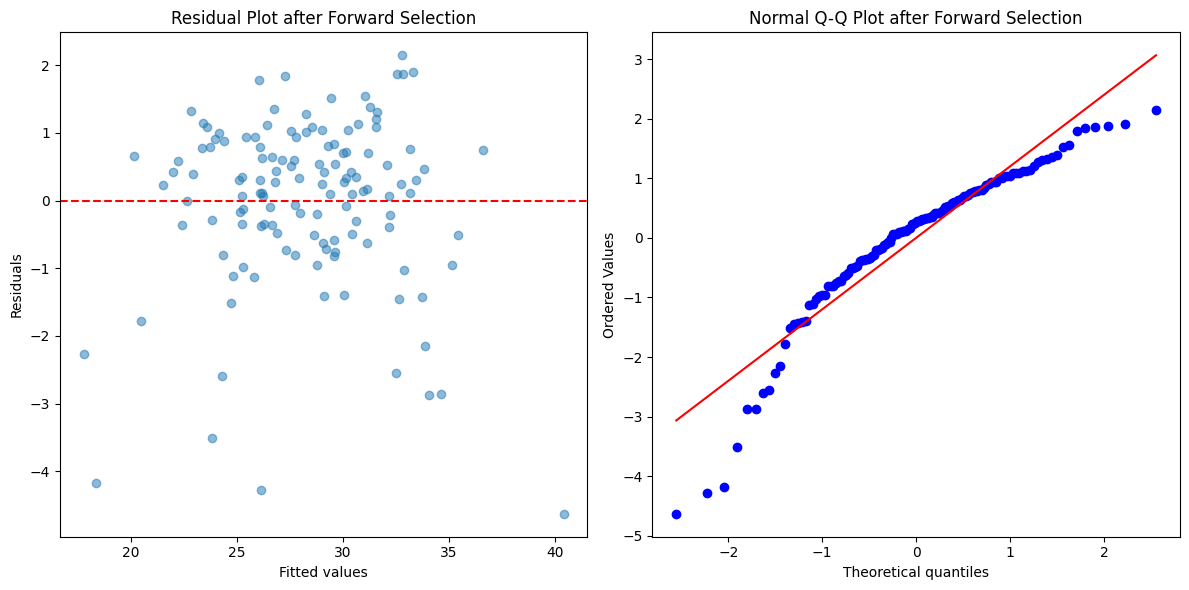

Stepwise Selection Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     228.2
Date:                Fri, 03 May 2024   Prob (F-statistic):           9.49e-61
Time:                        10:50:27   Log-Likelihood:                -214.52
No. Observations:                 130   AIC:                             441.0
Df Residuals:                     124   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7

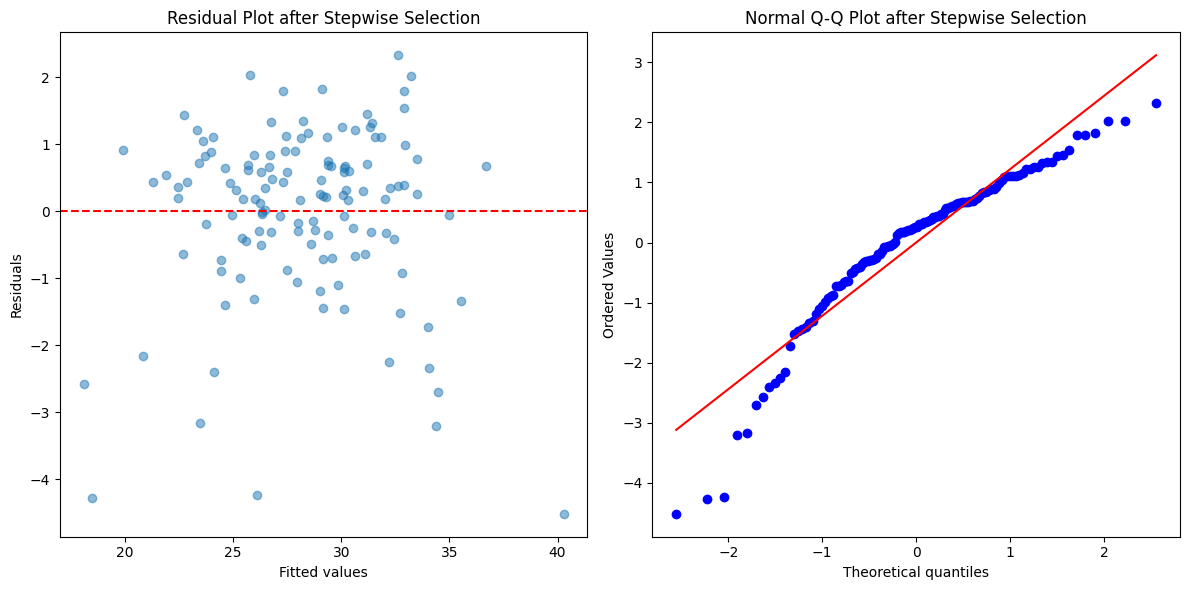

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

def forward_selection(X, Y, significance_level=0.05):
    remaining_features = list(X.columns)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            model = sm.OLS(Y, sm.add_constant(X[selected_features + [candidate]])).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if best_new_score < current_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
        else:
            break
    model = sm.OLS(Y, sm.add_constant(X[selected_features])).fit()
    return model, X[selected_features]

def stepwise_selection(X, Y, significance_level=0.05):
    included = []
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < significance_level:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > significance_level:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    return model, X[included]

# Forward Selection
forward_model, X_forward_selected = forward_selection(X_clean_with_dummies, Y_clean)
print("Forward Selection Model Summary:")
print(forward_model.summary())

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
residuals_forward = forward_model.resid
plt.scatter(forward_model.predict(), residuals_forward, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot after Forward Selection')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Normal QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_forward, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot after Forward Selection')

plt.tight_layout()
plt.show()

# Stepwise Selection
stepwise_model, X_stepwise_selected = stepwise_selection(X_clean_with_dummies, Y_clean)
print("Stepwise Selection Model Summary:")
print(stepwise_model.summary())

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
residuals_stepwise = stepwise_model.resid
plt.scatter(stepwise_model.predict(), residuals_stepwise, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot after Stepwise Selection')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Normal QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_stepwise, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot after Stepwise Selection')

plt.tight_layout()
plt.show()


AICp, SBCp, Adjusted R2, Mallow's Cp and PRESSp

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Function to calculate Mallows Cp
def calculate_mallows_cp(n, p, sse, sse_full):
    return (sse / sse_full) - (n - 2*p)

# Function to calculate PRESSp
def calculate_pressp(n, p, sse, sse_full):
    return sse / (n - p)

# Initialize lists to store results
results = []

# Loop over all possible combination sizes
for size in range(1, len(X_clean_with_dummies.columns) + 1):
    # Generate all combinations of predictor variables of the current size
    combinations = itertools.combinations(X_clean_with_dummies.columns, size)

    # Loop over each combination
    for combo in combinations:
        # Fit the model
        model = sm.OLS(Y_clean, sm.add_constant(X_clean_with_dummies[list(combo)])).fit()

        # Get model performance metrics
        aic = model.aic
        bic = model.bic
        adjusted_r_squared = model.rsquared_adj
        sse = model.ssr
        n = len(Y_clean)
        p = len(combo) + 1  # Add 1 for the constant term

        # Fit the full model
        full_model = sm.OLS(Y_clean, sm.add_constant(X_clean_with_dummies)).fit()
        sse_full = full_model.ssr

        # Calculate Mallows Cp and PRESSp
        mallows_cp = calculate_mallows_cp(n, p, sse, sse_full)
        pressp = calculate_pressp(n, p, sse, sse_full)

        # Append results to the list
        results.append({
            'Combination': ', '.join(combo),
            'Size': size,
            'AIC': aic,
            'BIC': bic,
            'Mallows Cp': mallows_cp,
            'PRESSp': pressp,
            'Adjusted R-squared': adjusted_r_squared
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the best of each value for a particular combination size
best_results = results_df.groupby('Size').apply(lambda x: x.loc[x['Adjusted R-squared'].idxmax()])
print(best_results)

# Print results DataFrame
print(results_df)


                                            Combination  Size         AIC  \
Size                                                                        
1                                                    X6     1  653.065244   
2                                                X6, X8     2  536.773955   
3                                            X6, X7, X8     3  457.169961   
4                                       X6, X7, X8, X11     4  444.819573   
5                                   X6, X7, X8, X9, X11     5  441.037458   
6                              X6, X7, X8, X9, X10, X11     6  439.497069   
7                        X6, X7, X8, X9, X10, X11, X2_1     7  439.828327   
8                 const, X6, X7, X8, X9, X10, X11, X2_1     8  439.828327   
9           const, X6, X7, X8, X9, X10, X11, X1_1, X2_1     9  440.839074   
10      const, X5, X6, X7, X8, X9, X10, X11, X1_1, X2_1    10  442.170543   
11    const, X4, X5, X6, X7, X8, X9, X10, X11, X1_1,...    11  443.924643   